Why is it a good idea to use prime numbers for hash functions? 
And why do we use prime numbers for the number of buckets?
_Based on https://cs.stackexchange.com/a/64191_

Let's consider a hash function given by `hash(k) = k mod 12`, so our hash table has 12 buckets.

First, we need to understand how collisions occurr in hash tables.
Two numbers with keys $k_1$ and $k_2$ are said to collide when `hash(k_1)=hash(k_2)` which is $k_1 \mod 12 = k_2 \mod 12$.

Now imagine that we have a list of values to add to our hash table, with the following keys respectively:
$
[ 0, 1, 2, \dots, 100].
$

The following code shows the size of each bucket in the hash table, after adding the above values.

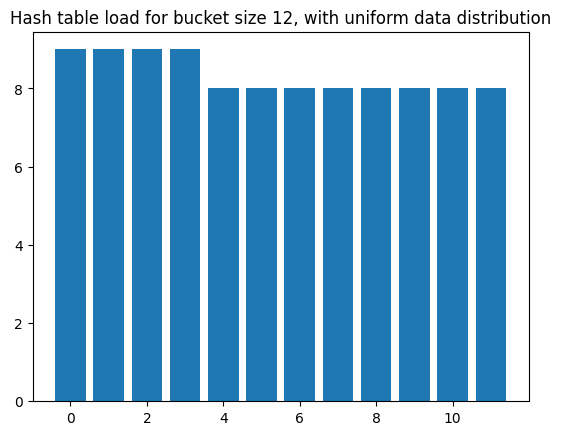

In [6]:
import array
import matplotlib.pyplot as plt

# Construct hash table (we don't really store the values, just count them up)
bucket_size = 12
hash = lambda k: k%bucket_size
numbers = [i for i in range(100)]
histogram = array.array('H',[0 for i in range(bucket_size)])
for key in numbers:
    bucket = hash(key)
    histogram[bucket] += 1

# Plot hash table (it's really just an histogram)
plt.figure()
plt.title(f"Hash table load for bucket size {bucket_size}, with uniform data distribution")
plt.bar(range(bucket_size), histogram)
plt.show()


As can be seen, the bucket size is fairly even accross the hash table.
In practice however, it is seldom the case that the data is so neatly distributed.

It is for example, more common that there are values that are more likely to occur than others. An example where this occurs is if the keys are strings, and the hash function is just adding the ascii code of each character, and then modding the result.

In any case, let's assume the extreme case where the set of keys consists of only numbers that are multiples of 3.

So we construct the list as follows:

In [7]:
non_uniform_numbers = [3*i for i in range(100)]

# Sort and print the first 20 numbers
non_uniform_numbers.sort()
print([n for n in non_uniform_numbers if n < 20])

[0, 3, 6, 9, 12, 15, 18]


Now we try filling in the hash table again, using the same hash function as before:


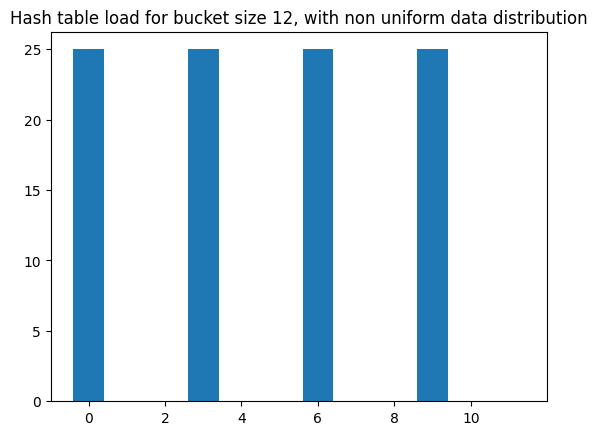

In [8]:
histogram = array.array('H',[0 for i in range(bucket_size)])
for key in non_uniform_numbers:
    bucket = hash(key)
    histogram[bucket] += 1

# Plot hash table (it's really just an histogram)
plt.figure()
plt.title(f"Hash table load for bucket size {bucket_size}, with non uniform data distribution")
plt.bar(range(bucket_size), histogram)
plt.show()


As you can see, it is less balanced.
In fact, the uneven buckets are 0, 3, 6, and 9.

To see why, suppose we only have multiples of 3 as keys, and observe how they are assigned to buckets:
```
Keys:     0  3  6  9  12 15 18 ...
          ↓  ↓  ↓  ↓  ↓  ↓  ↓ 
Bucket:   0  3  6  9  0  3  6  ...
```

Which explains the uneven buckets above.

Now let's try with a bucket size of 10, and the same unbalanced data.

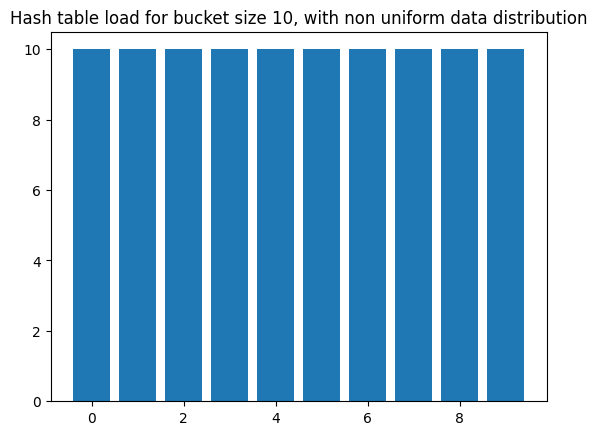

In [9]:
# Construct hash table (we don't really store the values, just count them up)
bucket_size = 10
hash = lambda k: k%bucket_size
histogram = array.array('H',[0 for i in range(bucket_size)])
for key in non_uniform_numbers:
    bucket = hash(key)
    histogram[bucket] += 1

# Plot hash table (it's really just an histogram)
plt.figure()
plt.title(f"Hash table load for bucket size {bucket_size}, with non uniform data distribution")
plt.bar(range(bucket_size), histogram)
plt.show()

It is again well balanced. And 10 is not a prime. So what's going on?

For the unbalanced data, the main difference between bucket size 10 and bucket size 12, is that the buckets that are multiples of 3 do not line up neatly inside the bucket size 10, as marked in bold:
```
Keys:     0  3  6  9  12 15 18 ...
          ↓  ↓  ↓  ↓  ↓  ↓  ↓ 
Bucket:   0  3  6  9  2  5  8  ...
```

Which explains the nicely balanced result above.

So the main issue is that 12 (the first bucket size) is a multiple of 3.

So the general rule is: since we know that the data might be biased, we want to decrease the chance that it is biased towards numbers **that divide the bucket size**. And which numbers are famous for having few divisors? The prime numbers!

Posted here: https://cs.stackexchange.com/a/157627/157743